In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [61]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
df.columns = ['sl', 'sw', 'pl', 'pw', 'label']
df

,sl,sw,pl,pw,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [63]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [65]:
max_k_range = train.shape[0]//2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

In [66]:
cross_validation_scores = []
x_train = train[['pl', 'pw']]
y_train = train[['label']]

In [67]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv = 10, scoring = 'accuracy')
    cross_validation_scores.append(scores.mean())

In [68]:
cross_validation_scores

[0.9416666666666667,
 0.9583333333333333,
 0.9583333333333333,
 0.9666666666666666,
 0.975,
 0.975,
 0.975,
 0.975,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333333,
 0.9666666666666666,
 0.9583333333333333,
 0.9666666666666666,
 0.95,
 0.95,
 0.95,
 0.9583333333333333,
 0.9583333333333333,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9416666666666667]

In [69]:
import matplotlib.pyplot as plt

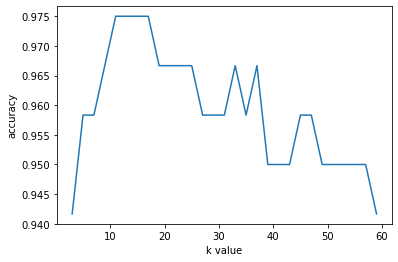

In [70]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

In [71]:
best_k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
best_k

11

In [72]:
knn = KNeighborsClassifier(n_neighbors = best_k)

In [73]:
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=11)

In [74]:
x_test = test[['pl', 'pw']]
y_test = test[['label']]

In [75]:
predictions = knn.predict(x_test)
predictions

array([2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0,
       2, 1, 1, 1, 0, 1, 1, 0])

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print("accuracy is " + str(accuracy_score(y_test.values.ravel(),predictions)))

accuracy is 0.9666666666666667


In [78]:
comparison = pd.DataFrame(
    {'pred' : predictions, 'truth' : y_test.values.ravel()}
)
comparison

,pred,truth
0,2,2
1,1,1
2,0,0
3,2,1
4,0,0
5,0,0
6,2,2
7,2,2
8,0,0
9,2,2
